In [3]:
# Import libraries
import pandas as pd

In [4]:
# Load raw data set
op_raw = pd.read_excel(open('data/op data anal - Morona BMAP.xlsx', 'rb'), usecols = "A:H", header = 1, sheet_name = 'subset summary')
bio_raw = pd.read_excel(open('data/raw data for Andres - Morona BMAP.xlsx', 'rb'), header = 0, sheet_name = 'Composition')

In [5]:
# Import variable translation csv
variable_data = pd.read_csv('data/Variable_translate.csv', header = None, encoding = 'unicode_escape')    

# Tranfrom csv to dictionary
trans_dict = variable_data.set_index(0).T.to_dict('index')[1]

# Translate column names to English
bio_raw = bio_raw.rename(columns = trans_dict)

In [6]:
bio_raw.head()

,Phase,Phase #,Date,Day,Plot,Distance,# Evaluators,Start Time,End Time,Encounter time,...,Location (m),Location Type,Behavior,Mass,Body Length,Tail Length,Photo Code,Hyssop Code,Capture Code,Additional Obs
0,EC,1,25/06/2014,7,52,150,3.0,00:01:00,00:41:00,00:20:00,...,0,En el suelo,Activo,1.13,25.4,NaN,NaN,Bd136,No colectado,Cerca al punto GPS
1,EC,1,25/06/2014,7,52,150,3.0,00:01:00,00:41:00,00:04:00,...,0.6,En hoja,Activo,0.84,20.55,NaN,NaN,Bd135,No colectado,NaN
2,EC,1,25/06/2014,7,52,150,3.0,00:01:00,00:41:00,00:16:00,...,0.3,En hoja,Activo,0.73,20.05,NaN,NaN,Bd139,No colectado,NaN
3,EC,1,25/06/2014,7,52,150,3.0,00:01:00,00:41:00,00:16:00,...,0.3,En hoja,Activo,0.18,13.21,NaN,NaN,Bd137,No colectado,NaN
4,EC,1,25/06/2014,7,52,150,3.0,00:01:00,00:41:00,00:31:00,...,1,En musgo de arbol,Activo,0.15,11.5,NaN,NaN,Bd138,No colectado,NaN


In [7]:
# Overview of bio_raw
bio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 27 columns):
Phase             821 non-null object
Phase #           821 non-null int64
Date              821 non-null object
Day               821 non-null int64
Plot              821 non-null int64
Distance          821 non-null int64
# Evaluators      731 non-null float64
Start Time        821 non-null object
End Time          821 non-null object
Encounter time    819 non-null object
Long E            821 non-null object
Lat (N)           821 non-null object
Height            821 non-null object
Zone              784 non-null object
Family            821 non-null object
Genus             821 non-null object
Species           821 non-null object
Location (m)      821 non-null object
Location Type     819 non-null object
Behavior          819 non-null object
Mass              810 non-null object
Body Length       812 non-null object
Tail Length       323 non-null object
Photo Code        325 no

In [8]:
bio_raw.describe()
# Make a copy of bio_raw
bio = bio_raw.copy()

In [9]:
# Convert long E, Lat (N), Height, Location, Mass, Body Length, Tail Length
bio['Long E'] = pd.to_numeric(bio['Long E'], errors='coerce')
bio['Lat (N)'] = pd.to_numeric(bio['Lat (N)'], errors='coerce')
bio['Height'] = pd.to_numeric(bio['Height'], errors='coerce')
bio['Location (m)'] = pd.to_numeric(bio['Location (m)'], errors='coerce')
bio['Mass'] = pd.to_numeric(bio['Mass'], errors='coerce')
bio['Body Length'] = pd.to_numeric(bio['Body Length'], errors='coerce')
bio['Tail Length'] = pd.to_numeric(bio['Tail Length'], errors='coerce')

In [10]:
bio.describe()

,Phase #,Day,Plot,Distance,# Evaluators,Long E,Lat (N),Height,Location (m),Mass,Body Length,Tail Length
count,821.000000,821.000000,821.000000,821.000000,731.000000,6.800000e+02,6.800000e+02,680.000000,815.000000,767.000000,780.000000,127.0
mean,2.911084,5.980512,44.158343,316.017052,3.954856,9.308130e+05,5.364388e+06,967.219719,11.900945,1.308879,21.840372,0.0
std,1.435826,3.161832,20.380329,318.450662,0.964798,2.378466e+06,4.119987e+06,82.451175,39.343724,2.104917,12.823960,0.0
min,1.000000,1.000000,1.000000,50.000000,3.000000,-7.196168e+01,-1.351959e+01,560.000000,0.000000,0.030000,0.600000,0.0
25%,2.000000,3.000000,32.000000,50.000000,3.000000,-7.100687e+01,-1.298822e+01,934.461457,0.000000,0.270000,14.000000,0.0
50%,3.000000,6.000000,49.000000,150.000000,4.000000,2.820750e+05,8.562653e+06,983.000000,0.300000,0.740000,20.190000,0.0
75%,4.000000,8.000000,62.000000,500.000000,5.000000,2.822682e+05,8.562910e+06,1018.026047,1.200000,1.410000,26.000000,0.0
max,5.000000,12.000000,70.000000,1000.000000,6.000000,8.563599e+06,8.563625e+06,1099.000000,300.000000,33.050000,180.000000,0.0


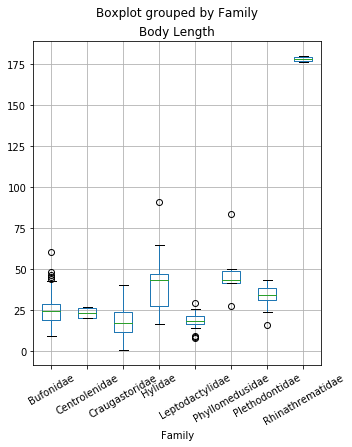

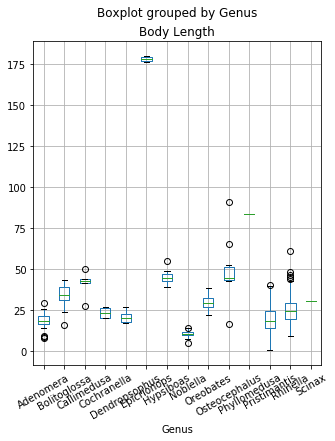

In [19]:
bio.boxplot('Body Length','Family',rot = 30,figsize=(5,6))
bio.boxplot('Body Length','Genus',rot = 30,figsize=(5,6))
# bio.boxplot('Body Length','Species',rot = 30,figsize=(5,6))
# To-do: Concatenate Family, Genus, Species

In [13]:
# Num of obs in each family
bio['Family'].value_counts()

Craugastoridae      493
Bufonidae           178
Leptodactylidae      61
Hylidae              53
Plethodontidae       14
Centrolenidae        14
Phyllomedusidae       6
Rhinathrematidae      2
Name: Family, dtype: int64

In [15]:
# Num of obs in each Genus
bio['Genus'].value_counts()

Pristimantis     391
Rhinella         178
Noblella          90
Adenomera         61
Hypsiboas         25
Osteocephalus     16
Cochranella       15
Bolitoglossa      14
Oreobates         12
Dendropsophus     10
Callimedusa        5
Epicrionops        2
Phyllomedusa       1
Scinax             1
Name: Genus, dtype: int64

In [16]:
# Num of obs in each Genus
bio['Species'].value_counts()

danae                176
tacana               159
sp                    90
gagliardi             66
andreae               61
ockendeni             57
aff pharangobates     57
sp nov                25
gr margaritifera      19
mimeticus             15
nola                  15
cf altamazonica       14
amarakaeri            12
aff altamazonica      11
aff parviceps          8
sp inglenaranja        7
olivaceus              6
tomopterna             5
diadematus             5
bicolor                2
okmoi                  2
pluvialis              2
divnae                 2
aff minutus            2
ruber                  1
taurinus               1
camba                  1
Name: Species, dtype: int64

In [34]:
# Time Span
bio['Date'].value_counts()
pd.to_datetime(bio['Date']).value_counts().sort_values()

2015-02-07     3
2015-02-10     3
2014-10-08     3
2016-07-13     3
2014-10-01     4
2014-10-07     5
2015-01-31     6
2014-06-27     7
2015-07-19     8
2015-02-01     9
2014-10-03     9
2014-09-29    10
2014-09-26    10
2014-06-19    10
2014-06-21    10
2016-10-07    11
2014-06-18    11
2014-06-20    11
2016-11-07    11
2014-10-04    11
2015-07-17    11
2015-07-15    12
2014-10-05    13
2014-06-26    13
2015-07-20    13
2015-07-22    13
2015-02-09    14
2014-09-27    14
2015-07-18    16
2015-02-02    16
2016-08-07    16
2016-12-07    17
2014-06-28    17
2014-09-28    18
2015-07-23    18
2015-07-16    19
2015-07-21    19
2014-10-06    19
2014-06-24    19
2014-09-30    20
2015-07-14    20
2016-09-07    20
2014-06-22    21
2016-07-14    22
2015-02-06    23
2016-07-15    24
2014-06-29    25
2014-06-25    25
2015-02-05    26
2015-02-08    26
2015-02-03    27
2014-06-30    29
2015-02-04    30
2016-07-16    31
Name: Date, dtype: int64